In [1]:
#pip install yfinance

In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-10, end.month, end.day)

In [4]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GOOG']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


In [5]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [6]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       0 non-null      float64
 1   High       0 non-null      float64
 2   Low        0 non-null      float64
 3   Close      0 non-null      float64
 4   Adj Close  0 non-null      float64
 5   Volume     0 non-null      float64
dtypes: float64(6)
memory usage: 0.0+ bytes


In [8]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing Price of Google data')

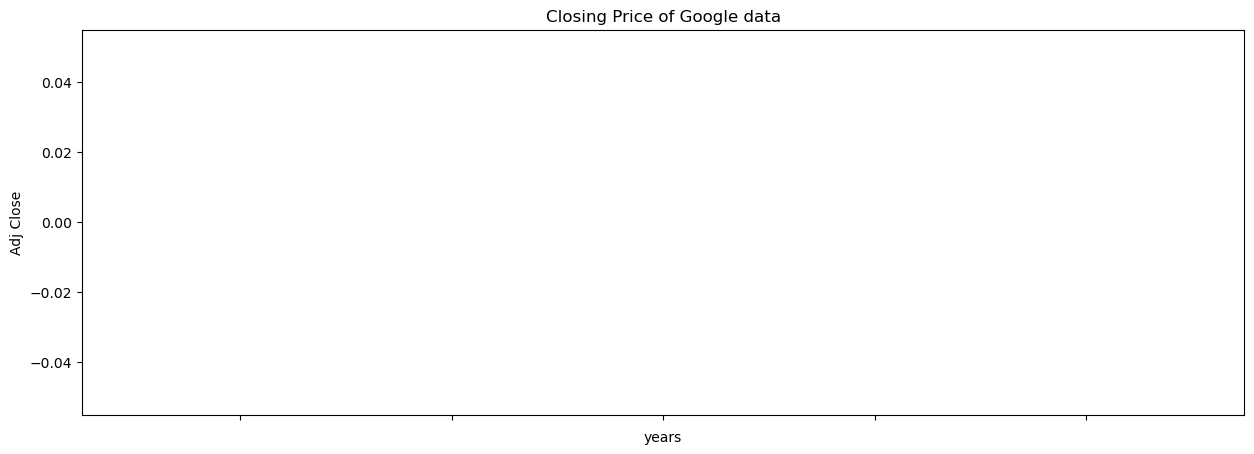

In [10]:
plt.figure(figsize=(15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing Price of Google data")

In [11]:
def plotgraph(figsize, values, colname):
    plt.figure(figsize=figsize)
    values.plot()
    plt.xlabel("years")
    plt.ylabel(colname)
    plt.title(f"{colname} of Google data")

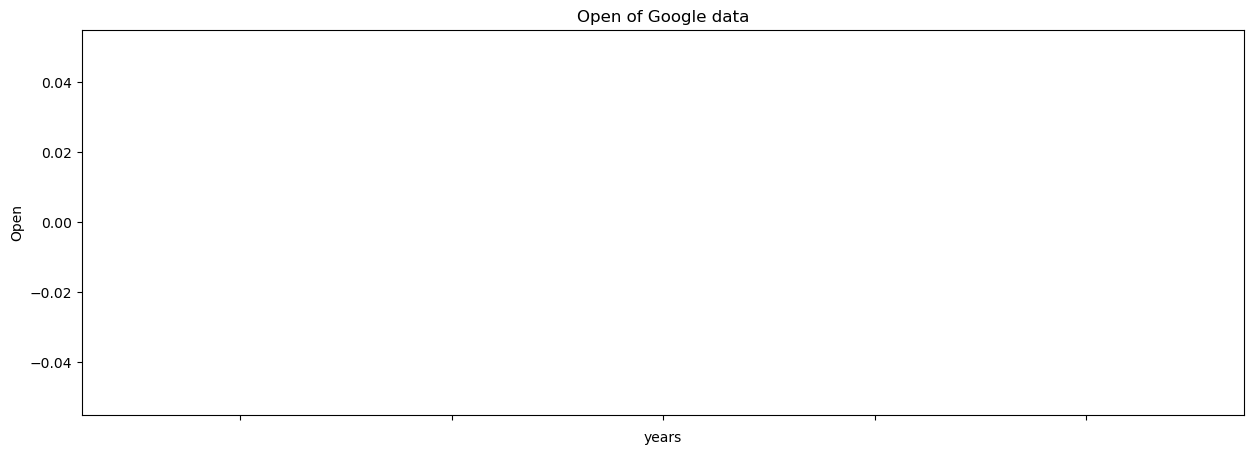

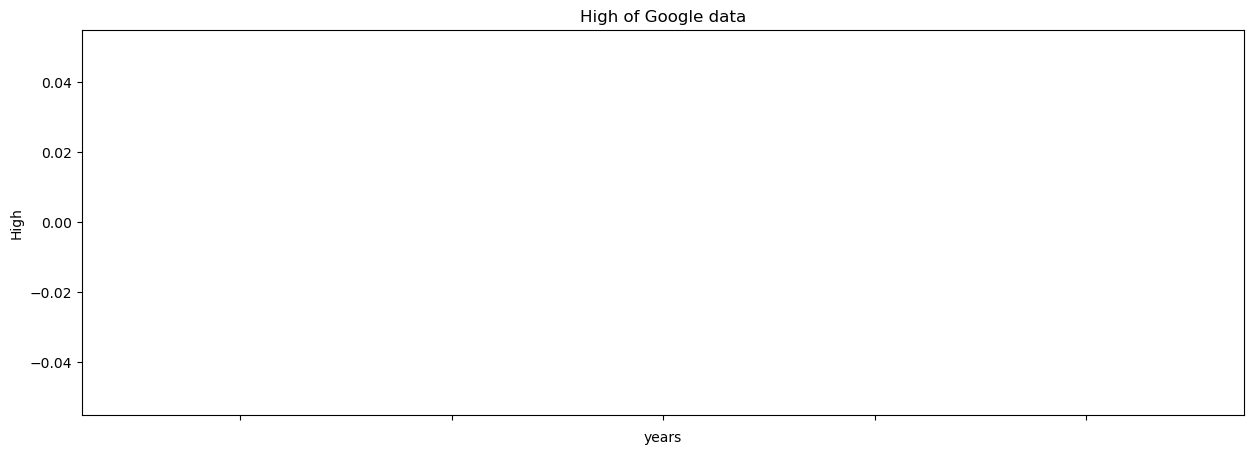

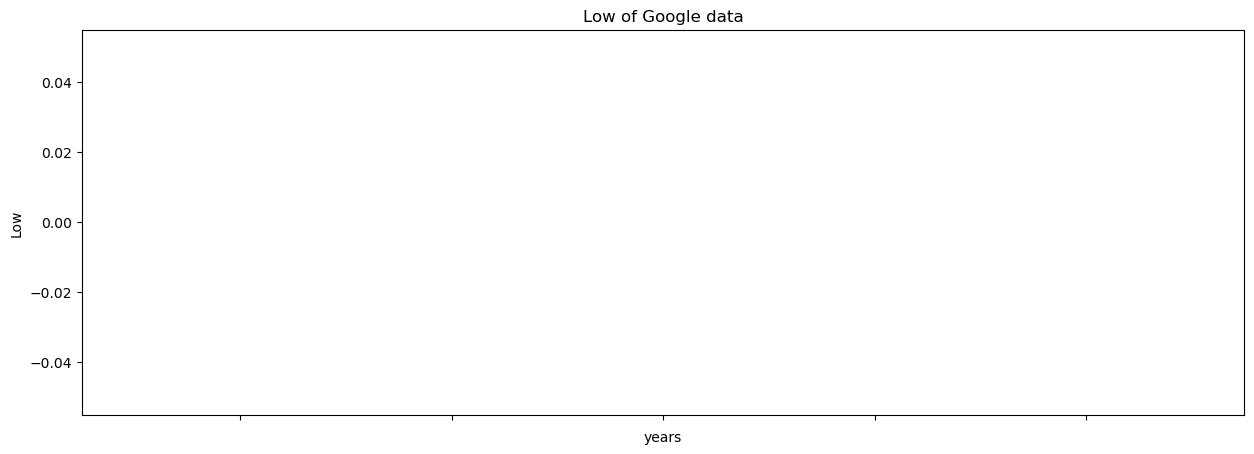

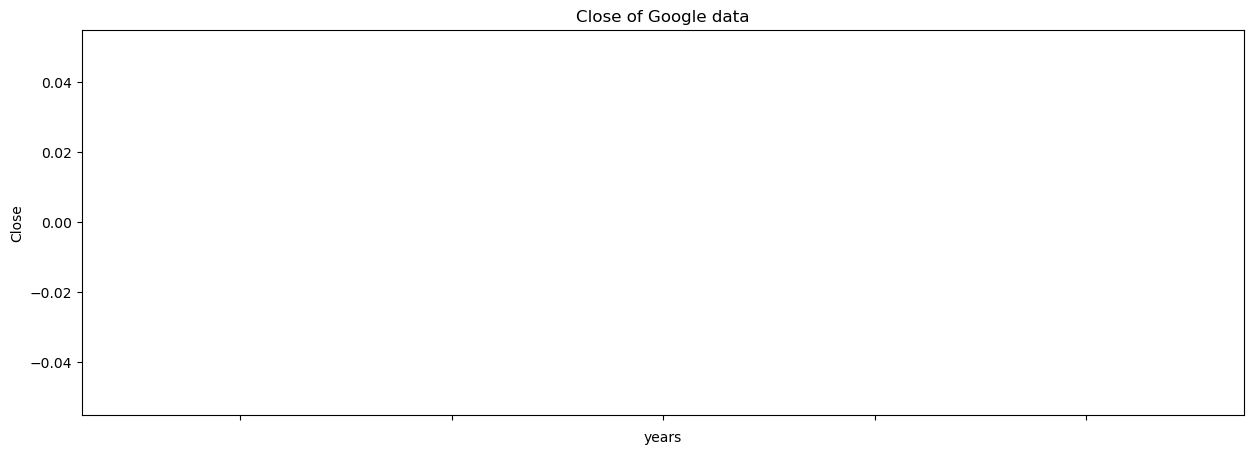

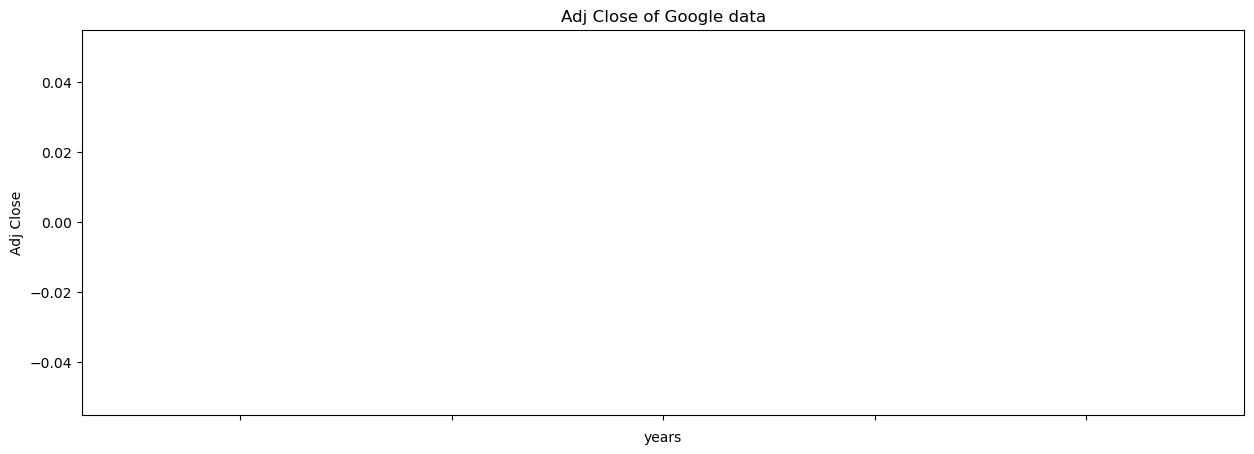

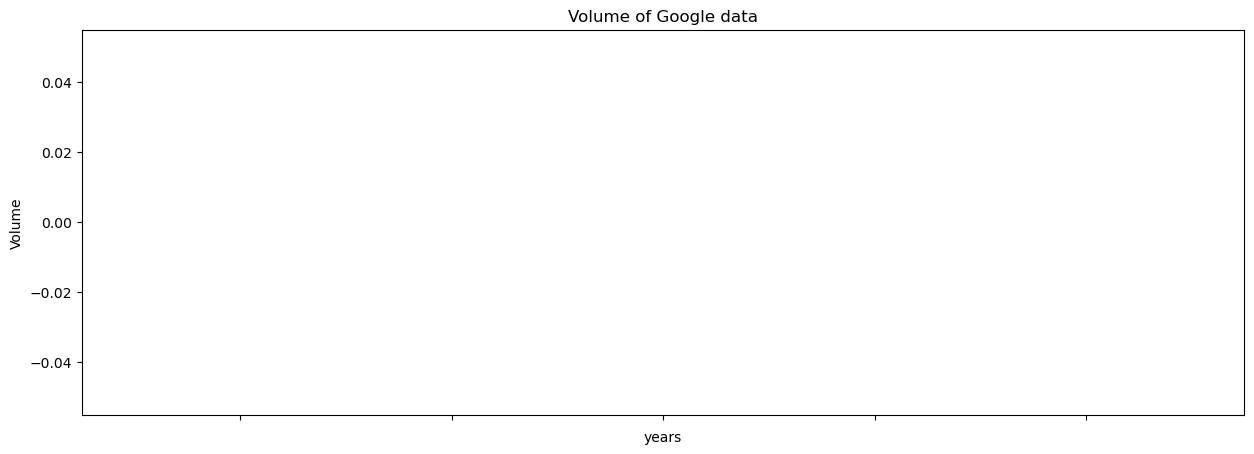

In [12]:
for column in google_data.columns:
    plotgraph((15,5), google_data[column],column)

In [13]:
import pandas as pd
data = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [14]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()

In [15]:
google_data['MA_for_100_days'][0:250].tail()

Series([], Name: MA_for_100_days, dtype: float64)

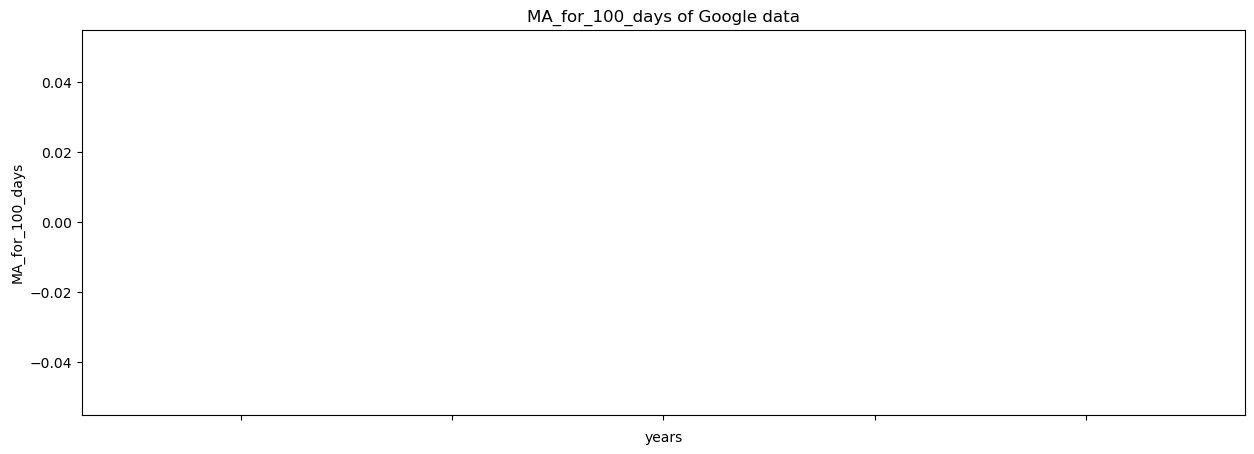

In [16]:
plotgraph((15,5), google_data['MA_for_100_days'],'MA_for_100_days')

In [17]:
google_data['percent_change_cp'] = google_data['Adj Close'].pct_change()

ValueError: attempt to get argmax of an empty sequence

In [ ]:
google_data[['Adj Close','percent_change_cp']].head()

,Adj Close,percent_change_cp
Date,,
2014-08-13,28.627735,NaN
2014-08-14,28.621262,-0.000226
2014-08-15,28.562988,-0.002036
2014-08-18,28.995308,0.015136
2014-08-19,29.229397,0.008073


In [ ]:
Adj_close_price = google_data[['Adj Close']]

In [ ]:
max(Adj_close_price.values), min(Adj_close_price.values)

(array([192.66000366]), array([24.53215408]))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaleddata= scaler.fit_transform(Adj_close_price)

In [ ]:
xdata=[]
ydata=[]
for i in range(100, len(scaleddata)):
    xdata.append(scaleddata[i-100:i])
    ydata.append(scaleddata[i])
    
import numpy as np
xdata,ydata=np.array(xdata), np.array(ydata)

In [ ]:
len(xdata)*0.7

1691.1999999999998

In [ ]:
splittinglen=int(len(xdata)*0.7)
xtrain=xdata[:splittinglen]
ytrain=ydata[:splittinglen]
xtest=xdata[splittinglen:]
ytest=ydata[splittinglen:]

In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

NameError: name 'xtrain' is not defined

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True,input_shape=(xtrain.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

E:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(xtrain,ytrain, batch_size=1, epochs=2)

Epoch 1/2
1691/1691 ━━━━━━━━━━━━━━━━━━━━ 68s 37ms/step - loss: 0.0014
Epoch 2/2
1691/1691 ━━━━━━━━━━━━━━━━━━━━ 66s 39ms/step - loss: 3.2608e-04


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [ ]:
predictions = model.predict(xtest)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step


In [ ]:
invpredictions = scaler.inverse_transform(predictions)

In [ ]:
inv_ytest = scaler.inverse_transform(ytest)

In [ ]:
rmse = np.sqrt(np.mean((invpredictions - inv_ytest)**2))

In [ ]:
ploting_data = pd.DataFrame(
    {
        'original_test_data': inv_ytest.reshape(-1),
        'predictions': invpredictions.reshape(-1)
    }, index = google_data.index[splittinglen+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2021-09-23,141.665298,143.760010
2021-09-24,142.470871,143.746750
2021-09-27,141.340164,144.078735
2021-09-28,136.029205,144.235260
2021-09-29,134.368088,143.183975


<Figure size 1500x600 with 0 Axes>

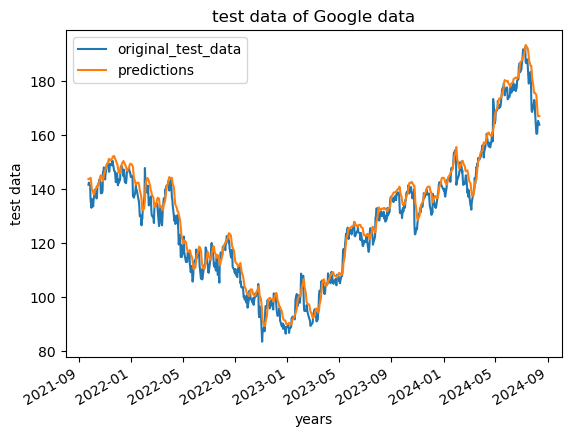

In [ ]:
plotgraph((15,6),ploting_data,'test data')

In [ ]:
plotgraph((15,6),pd.concat([Adj_close_price[:splittinglen+100],ploting_data],axis=0),'whole data')

NameError: name 'plotgraph' is not defined

In [ ]:
model.save("Latest_stockprice_model.keras")